<a href="https://colab.research.google.com/github/CeliaDiazSanchez/Data-Mining/blob/LAB05/LAB05%20SEX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [403]:
import requests
import warnings
import pandas as pd
import numpy as np
import plotly.express as px
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
import networkx as nx
import matplotlib.pyplot as plt
# Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
# Measure the performance of the models
from sklearn import metrics
# Split the data
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RepeatedStratifiedKFold
# Other Machine learning libraries
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.neighbors import KNeighborsClassifier

# URL del archivo CSV en GitHub
url = "https://raw.githubusercontent.com/CeliaDiazSanchez/Data-Mining/LAB05/abalone.csv"
nombre = 'abalone.csv'

url2 = "https://raw.githubusercontent.com/CeliaDiazSanchez/Data-Mining/LAB05/abalone_original.csv"
nombre2 = 'abalone_original.csv'

url3 = "https://raw.githubusercontent.com/CeliaDiazSanchez/Data-Mining/LAB05/abalone_test.csv"
nombre3 = 'abalone_test.csv'

url4 = "https://raw.githubusercontent.com/CeliaDiazSanchez/Data-Mining/LAB05/mix_abalone_train.csv"
nombre4 = 'mix_abalone_train.csv'

# Realizar la solicitud GET para obtener el contenido del archivo
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
     # Guardar el contenido del archivo en un archivo local
    with open(nombre, 'wb') as f:
        f.write(response.content)
    print("Archivo descargado exitosamente.")
else:
    print("Error al descargar el archivo.")

# Realizar la solicitud GET para obtener el contenido del archivo
response = requests.get(url2)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
     # Guardar el contenido del archivo en un archivo local
    with open(nombre2, 'wb') as f:
        f.write(response.content)
    print("Archivo descargado exitosamente.")
else:
    print("Error al descargar el archivo.")

# Realizar la solicitud GET para obtener el contenido del archivo
response = requests.get(url3)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
     # Guardar el contenido del archivo en un archivo local
    with open(nombre3, 'wb') as f:
        f.write(response.content)
    print("Archivo descargado exitosamente.")
else:
    print("Error al descargar el archivo.")

# Realizar la solicitud GET para obtener el contenido del archivo
response = requests.get(url4)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
     # Guardar el contenido del archivo en un archivo local
    with open(nombre4, 'wb') as f:
        f.write(response.content)
    print("Archivo descargado exitosamente.")
else:
    print("Error al descargar el archivo.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Archivo descargado exitosamente.
Archivo descargado exitosamente.
Archivo descargado exitosamente.
Archivo descargado exitosamente.


In [404]:
df = pd.read_csv('abalone.csv')
# Mostramos las 5 primeras entradas del dataset
df.head(10)
df_sorted = df.sort_values(by='Whole weight', ascending=True)
df_sorted.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
236,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
238,I,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
2114,I,0.130,0.095,0.035,0.0105,0.0050,0.0065,0.0035,4
237,I,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
1429,I,0.140,0.105,0.035,0.0140,0.0055,0.0025,0.0040,3
3899,I,0.140,0.105,0.035,0.0145,0.0050,0.0035,0.0050,4
2169,I,0.165,0.115,0.015,0.0145,0.0055,0.0030,0.0050,4
719,I,0.150,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2
526,M,0.155,0.110,0.040,0.0155,0.0065,0.0030,0.0050,3
696,I,0.155,0.105,0.050,0.0175,0.0050,0.0035,0.0050,4


In [405]:
df2 = pd.read_csv('abalone_original.csv')
# Mostramos las 5 primeras entradas del dataset
df2.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7
5,I,85,60,19,70.3,28.2,15.5,24.0,8
6,F,106,83,30,155.5,47.4,28.3,66.0,20
7,F,109,85,25,153.6,58.8,29.9,52.0,16
8,M,95,74,25,101.9,43.3,22.5,33.0,9
9,F,110,88,30,178.9,62.9,30.2,64.0,19


In [406]:
df3 = pd.read_csv('abalone_test.csv')
# Mostramos las 5 primeras entradas del dataset
df3.head(10)
df_sorted3 = df3.sort_values(by='Height', ascending=False)
df_sorted3.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
6846,I,0.475,0.360,1.095,0.4155,0.1780,0.0905,0.1365
51380,I,0.435,0.335,1.065,0.3625,0.1340,0.0830,0.1175
7231,I,0.665,0.515,1.005,1.0455,0.6430,0.2355,0.3490
56003,F,0.625,0.480,0.650,1.3475,0.5450,0.2565,0.4750
6212,M,0.370,0.290,0.600,0.2825,0.0935,0.0575,0.0815
4338,M,0.750,0.565,0.515,2.1055,1.0200,0.4465,0.5080
58424,F,0.725,0.590,0.495,2.2385,0.7640,0.4200,0.5850
24105,F,0.575,0.460,0.375,0.9575,0.4435,0.2325,0.2900
49825,F,0.625,0.480,0.350,1.2655,0.6025,0.3075,0.3150
45057,M,0.680,0.545,0.290,1.4630,0.5215,0.3255,0.4700


In [407]:
df4 = pd.read_csv('mix_abalone_train.csv')
# Mostramos las 5 primeras entradas del dataset
df4.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
5,F,0.610,0.480,0.170,1.2010,0.5335,0.3135,0.3085,10
6,M,0.415,0.325,0.110,0.3315,0.1655,0.0715,0.1300,9
7,F,0.610,0.490,0.150,1.1165,0.4955,0.2945,0.2950,9
8,I,0.205,0.150,0.040,0.0460,0.0145,0.0105,0.0100,4
9,I,0.565,0.425,0.125,0.6510,0.3795,0.1420,0.1800,8


In [408]:
df = df.rename(columns={'Whole weight': 'Whole_weight'})
df = df.rename(columns={'Shucked weight': 'Shucked_weight'})
df = df.rename(columns={'Viscera weight': 'Viscera_weight'})
df = df.rename(columns={'Shell weight': 'Shell_weight'})
df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [409]:
df2 = df2.rename(columns={'sex': 'Sex'})
df2 = df2.rename(columns={'length': 'Length'})
df2 = df2.rename(columns={'diameter': 'Diameter'})
df2 = df2.rename(columns={'height': 'Height'})
df2 = df2.rename(columns={'whole-weight': 'Whole_weight'})
df2 = df2.rename(columns={'shucked-weight': 'Shucked_weight'})
df2 = df2.rename(columns={'viscera-weight': 'Viscera_weight'})
df2 = df2.rename(columns={'shell-weight': 'Shell_weight'})
df2 = df2.rename(columns={'rings': 'Rings'})
df2.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7
5,I,85,60,19,70.3,28.2,15.5,24.0,8
6,F,106,83,30,155.5,47.4,28.3,66.0,20
7,F,109,85,25,153.6,58.8,29.9,52.0,16
8,M,95,74,25,101.9,43.3,22.5,33.0,9
9,F,110,88,30,178.9,62.9,30.2,64.0,19


In [410]:
# Convirtiendo las variables Length, Diameter y Height a centímetros (cm)
df['Length'] = df['Length'] * 10
df['Diameter'] = df['Diameter'] * 10
df['Height'] = df['Height'] * 10
df['Whole_weight'] = df['Whole_weight'] * 100
df['Shell_weight'] = df['Shell_weight'] * 100 # A GRAMOS
df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,4.55,3.65,0.95,51.40,0.2245,0.1010,15.0,15
1,M,3.50,2.65,0.90,22.55,0.0995,0.0485,7.0,7
2,F,5.30,4.20,1.35,67.70,0.2565,0.1415,21.0,9
3,M,4.40,3.65,1.25,51.60,0.2155,0.1140,15.5,10
4,I,3.30,2.55,0.80,20.50,0.0895,0.0395,5.5,7
5,I,4.25,3.00,0.95,35.15,0.1410,0.0775,12.0,8
6,F,5.30,4.15,1.50,77.75,0.2370,0.1415,33.0,20
7,F,5.45,4.25,1.25,76.80,0.2940,0.1495,26.0,16
8,M,4.75,3.70,1.25,50.95,0.2165,0.1125,16.5,9
9,F,5.50,4.40,1.50,89.45,0.3145,0.1510,32.0,19


In [411]:
# Convirtiendo las variables Length, Diameter y Height a centímetros (cm)
df2['Length'] = df2['Length'] * 0.1
df2['Diameter'] = df2['Diameter'] * 0.1
df2['Height'] = df2['Height'] * 0.1
df2.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,9.1,7.3,1.9,102.8,44.9,20.2,30.0,15
1,M,7.0,5.3,1.8,45.1,19.9,9.7,14.0,7
2,F,10.6,8.4,2.7,135.4,51.3,28.3,42.0,9
3,M,8.8,7.3,2.5,103.2,43.1,22.8,31.0,10
4,I,6.6,5.1,1.6,41.0,17.9,7.9,11.0,7
5,I,8.5,6.0,1.9,70.3,28.2,15.5,24.0,8
6,F,10.6,8.3,3.0,155.5,47.4,28.3,66.0,20
7,F,10.9,8.5,2.5,153.6,58.8,29.9,52.0,16
8,M,9.5,7.4,2.5,101.9,43.3,22.5,33.0,9
9,F,11.0,8.8,3.0,178.9,62.9,30.2,64.0,19


In [412]:
# Convirtiendo las variables Length, Diameter y Height a centímetros (cm)
df3['Length'] = df3['Length'] * 10
df3['Diameter'] = df3['Diameter'] * 10
df3['Height'] = df3['Height'] * 10
df3['Whole_weight'] = df3['Whole_weight'] * 100
df3['Shell_weight'] = df3['Shell_weight'] * 100 # A GRAMOS
df3.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,6.45,4.75,1.55,123.80,0.6185,0.3125,30.05
1,M,5.80,4.60,1.60,98.30,0.4785,0.2195,27.50
2,M,5.60,4.20,1.40,83.95,0.3525,0.1845,24.05
3,M,5.70,4.90,1.45,87.40,0.3525,0.1865,23.50
4,I,4.15,3.25,1.10,35.80,0.1575,0.0670,10.50
5,M,5.60,4.25,1.40,81.05,0.3525,0.1915,21.50
6,M,6.35,4.90,1.70,118.35,0.4605,0.2445,35.50
7,I,3.40,2.50,0.75,16.75,0.0750,0.0330,4.80
8,I,4.85,3.70,1.10,53.60,0.2565,0.0980,14.90
9,F,6.40,5.00,1.95,133.80,0.6470,0.3175,39.65


In [413]:
# Convirtiendo las variables Length, Diameter y Height a centímetros (cm)
df4['Length'] = df4['Length'] * 10
df4['Diameter'] = df4['Diameter'] * 10
df4['Height'] = df4['Height'] * 10
df4['Whole_weight'] = df4['Whole_weight'] * 100
df4['Shell_weight'] = df4['Shell_weight'] * 100 # A GRAMOS
df4.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,F,5.50,4.30,1.50,77.15,0.3285,0.1465,24.00,11
1,F,6.30,4.90,1.45,113.00,0.4580,0.2765,32.00,11
2,I,1.60,1.10,0.25,2.10,0.0055,0.0030,0.50,6
3,M,5.95,4.75,1.50,91.45,0.3755,0.2055,25.00,10
4,I,5.55,4.25,1.30,78.20,0.3695,0.1600,19.75,9
5,F,6.10,4.80,1.70,120.10,0.5335,0.3135,30.85,10
6,M,4.15,3.25,1.10,33.15,0.1655,0.0715,13.00,9
7,F,6.10,4.90,1.50,111.65,0.4955,0.2945,29.50,9
8,I,2.05,1.50,0.40,4.60,0.0145,0.0105,1.00,4
9,I,5.65,4.25,1.25,65.10,0.3795,0.1420,18.00,8


In [414]:
# Combina las bases de datos
basedatos_completa = pd.concat([df, df2, df3, df4], ignore_index=True)

# Guarda la base de datos combinada en un nuevo archivo CSV
basedatos_completa.to_csv('basedatos_completa.csv', index=False)
basedatos_completa.head(100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,4.55,3.65,0.95,51.40,0.2245,0.1010,15.0,15.0
1,M,3.50,2.65,0.90,22.55,0.0995,0.0485,7.0,7.0
2,F,5.30,4.20,1.35,67.70,0.2565,0.1415,21.0,9.0
3,M,4.40,3.65,1.25,51.60,0.2155,0.1140,15.5,10.0
4,I,3.30,2.55,0.80,20.50,0.0895,0.0395,5.5,7.0
...,...,...,...,...,...,...,...,...,...
95,M,6.65,5.35,1.95,160.60,0.5755,0.3880,48.0,14.0
96,M,5.35,4.35,1.50,72.50,0.2690,0.1385,25.0,9.0
97,M,4.70,3.75,1.30,52.30,0.2140,0.1320,14.5,8.0
98,M,4.70,3.70,1.30,52.25,0.2010,0.1330,16.5,7.0


In [415]:
basedatos_completa.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Sex                   0
Length                0
Diameter              0
Height                0
Whole_weight          0
Shucked_weight        0
Viscera_weight        0
Shell_weight          0
Rings             60411
dtype: int64

RINGS QUITAMOS PORQUE NO QUEREMOS MATARLOS Y SHUCKED WEIGHT Y VISCERA WEIGHT.

In [416]:
basedatos_completa = basedatos_completa.drop(columns=['Rings'])
basedatos_completa = basedatos_completa.drop(columns=['Shucked_weight'])
basedatos_completa = basedatos_completa.drop(columns=['Viscera_weight'])
basedatos_completa = basedatos_completa.drop(columns=['Shell_weight'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [417]:
basedatos_completa.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Sex             0
Length          0
Diameter        0
Height          0
Whole_weight    0
dtype: int64

CON ESTOS DATOS NO MATAMOS AL MOLUSCO Y PODEMOS PREDECIR EL SEXO PARA PODER CRUZARLOS Y HACER POBLACIONES

In [418]:
# 1. Cantidad de Datos y Valores Nulos
cantidad_datos = basedatos_completa.shape
valores_nulos = basedatos_completa.isna().sum()

print("Cantidad de Datos:")
print(cantidad_datos)
print("\nValores Nulos:")
print(valores_nulos)

Cantidad de Datos:
(163557, 5)

Valores Nulos:
Sex             0
Length          0
Diameter        0
Height          0
Whole_weight    0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [419]:
# 2. Tipo de Datos
tipos_datos = basedatos_completa.dtypes
print("\nTipos de Datos:")
print(tipos_datos)


Tipos de Datos:
Sex              object
Length          float64
Diameter        float64
Height          float64
Whole_weight    float64
dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [420]:
# 3. Filas Repetidas
filas_repetidas = basedatos_completa.duplicated().sum()
print("\nCantidad de Filas Repetidas:")
print(filas_repetidas)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Cantidad de Filas Repetidas:
20752


In [421]:
# Eliminamos filas duplicadas
basedatos_sin_duplicados = basedatos_completa.drop_duplicates()

# Verificamos la nueva forma del DataFrame después de eliminar las filas duplicadas
print("Forma del DataFrame después de eliminar filas duplicadas:", basedatos_sin_duplicados.shape)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Forma del DataFrame después de eliminar filas duplicadas: (142805, 5)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


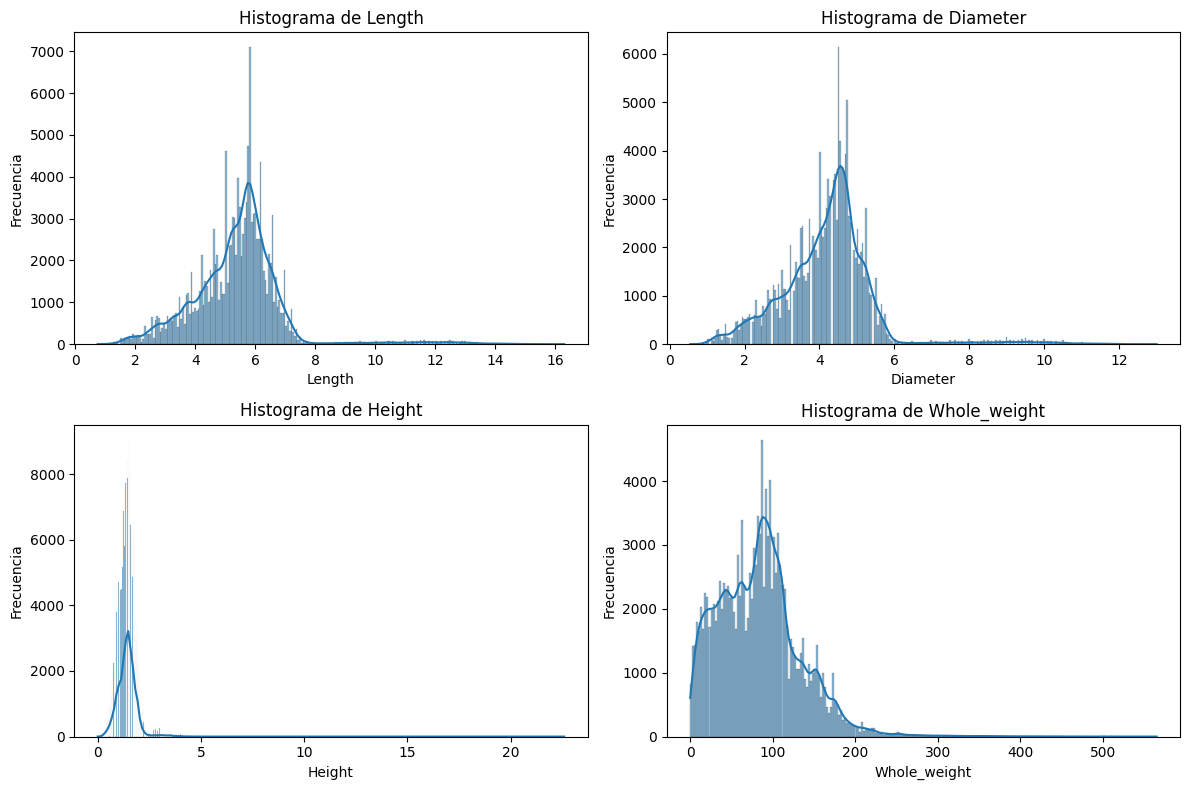

In [422]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de columnas para hacer histogramas
columnas_para_histograma = ['Length', 'Diameter', 'Height', 'Whole_weight']

# Configuración de tamaño de la figura
plt.figure(figsize=(12, 8))

# Iteración sobre las columnas para generar histogramas
for i, columna in enumerate(columnas_para_histograma, 1):
    plt.subplot(2, 2, i)
    sns.histplot(basedatos_sin_duplicados[columna], kde=True)  # Utilizamos histplot en lugar de boxplot
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


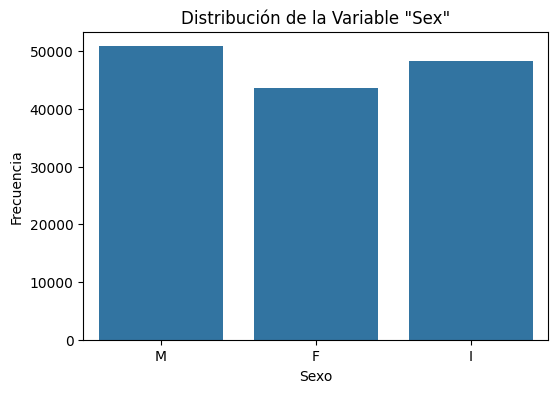

In [423]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de tamaño de la figura
plt.figure(figsize=(6, 4))

# Gráfico de barras para la variable "Sex"
sns.countplot(x='Sex', data=basedatos_sin_duplicados)
plt.title('Distribución de la Variable "Sex"')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')

plt.show()


CORTAMOS LENGTH DIAMETER Y WEIGHT



In [424]:
# Seleccionar las filas que cumplen con las condiciones especificadas
basedatos_filtrada = basedatos_sin_duplicados.loc[(basedatos_sin_duplicados['Length'] <= 8.5) &
                                            (basedatos_sin_duplicados['Diameter'] <= 6.5) &
                                            (basedatos_sin_duplicados['Height'] <= 2.7)]

# Verificar la forma del DataFrame filtrado
basedatos_filtrada.head(10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sex,Length,Diameter,Height,Whole_weight
0,M,4.55,3.65,0.95,51.40
1,M,3.50,2.65,0.90,22.55
2,F,5.30,4.20,1.35,67.70
3,M,4.40,3.65,1.25,51.60
4,I,3.30,2.55,0.80,20.50
5,I,4.25,3.00,0.95,35.15
6,F,5.30,4.15,1.50,77.75
7,F,5.45,4.25,1.25,76.80
8,M,4.75,3.70,1.25,50.95
9,F,5.50,4.40,1.50,89.45


In [425]:
print("Forma del DataFrame después de aplicar los cortes:", basedatos_filtrada.shape)


Forma del DataFrame después de aplicar los cortes: (139422, 5)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


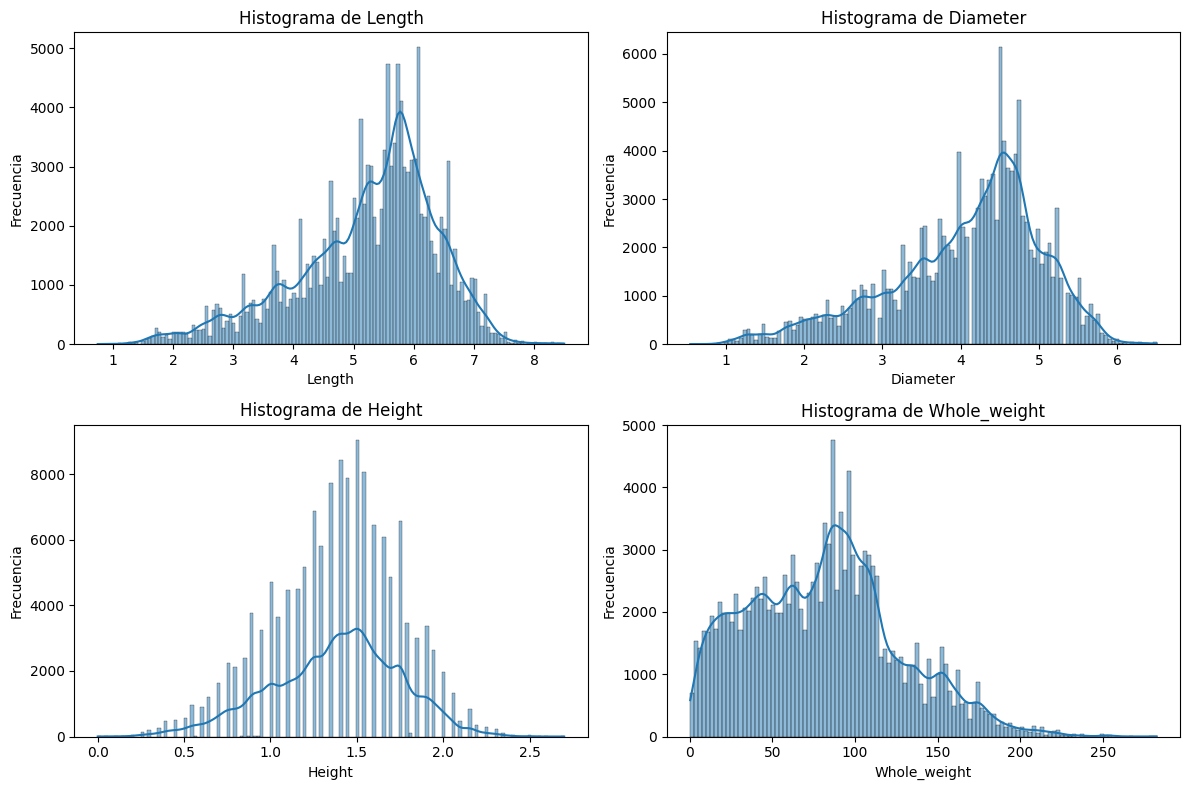

In [426]:
# Lista de columnas para hacer histogramas
columnas_para_histograma = ['Length', 'Diameter', 'Height', 'Whole_weight']

# Configuración de tamaño de la figura
plt.figure(figsize=(12, 8))

# Iteración sobre las columnas para generar histogramas
for i, columna in enumerate(columnas_para_histograma, 1):
    plt.subplot(2, 2, i)
    sns.histplot(basedatos_filtrada[columna], kde=True)  # Utilizamos histplot en lugar de boxplot
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


In [427]:
# Lista de columnas para calcular la matriz de correlación
columnas_para_histograma = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight']

# Crear una copia del DataFrame con solo las columnas de interés
df_regr = basedatos_filtrada[columnas_para_histograma].copy()

# Convertir la variable categórica 'Sex' a una representación numérica
df_regr['Sex'] = df_regr['Sex'].astype('category').cat.codes

# Calcular la matriz de correlación
matriz_correlacion = df_regr.corr()

# Visualizar la matriz de correlación
print("Matriz de Correlación:")
print(matriz_correlacion)


Matriz de Correlación:
                   Sex    Length  Diameter    Height  Whole_weight
Sex           1.000000 -0.023650 -0.024942 -0.032990     -0.029757
Length       -0.023650  1.000000  0.988278  0.918017      0.914513
Diameter     -0.024942  0.988278  1.000000  0.922462      0.919952
Height       -0.032990  0.918017  0.922462  1.000000      0.896274
Whole_weight -0.029757  0.914513  0.919952  0.896274      1.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


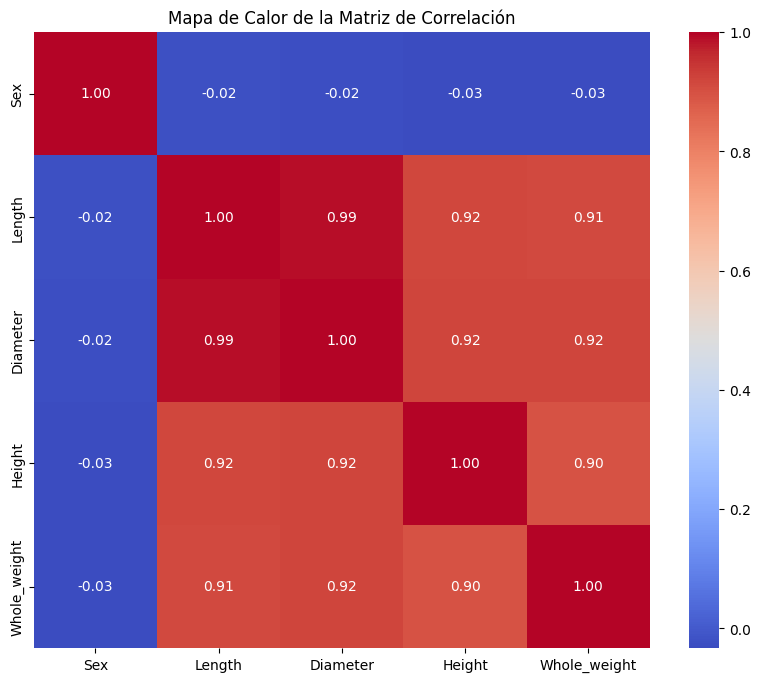

In [428]:
# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

In [429]:
df_regr = df_regr.drop(columns=['Diameter'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [430]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dividir los datos en variables independientes (X) y variable dependiente (y)
X = df_regr.drop(columns=['Sex'])  # Variables independientes
y = df_regr['Sex']  # Variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión logística
modelo = LogisticRegression(max_iter=1000)  # Crear el modelo
modelo.fit(X_train, y_train)  # Entrenar el modelo

# Realizar predicciones en el conjunto de prueba
predicciones = modelo.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, predicciones)
print("Precisión del modelo:", accuracy)

# Imprimir el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, predicciones))

# Imprimir la matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, predicciones))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Precisión del modelo: 0.5713466021158329

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.50      0.23      0.32      8504
           1       0.72      0.83      0.77      9503
           2       0.47      0.62      0.53      9878

    accuracy                           0.57     27885
   macro avg       0.56      0.56      0.54     27885
weighted avg       0.56      0.57      0.55     27885


Matriz de Confusión:
[[1965 1223 5316]
 [  61 7870 1572]
 [1892 1889 6097]]
